In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np

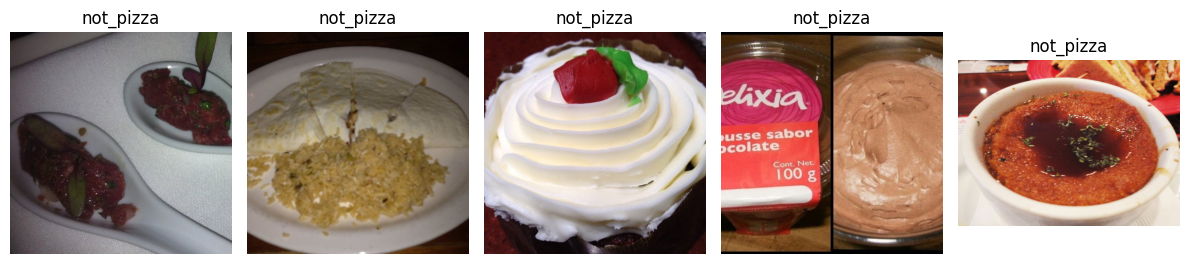

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

data_dir = 'dataset'
class_name = "not_pizza"
class_path = os.path.join(data_dir, class_name)

# List a few image file names
image_files = os.listdir(class_path)[:5]  # Get first 5 images

# Plot them
plt.figure(figsize=(12, 6))
for i, image_name in enumerate(image_files):
    image_path = os.path.join(class_path, image_name)
    img = Image.open(image_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Set parameters
img_size = (128, 128)
batch_size = 32 #to implement mini batch gradient descent
epochs = 20
learning_rate = 0.0001

In [7]:
# Data augmentation + normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Important for metrics later
)

# used pre-trained model MobileNetV2 for better results/ hidden convolutional layer
base_model = MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze feature extractor to not update weights on MobileNetV2 and impact the model

# Build model with droupouts to drop neurons for better generalization
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'), #fully connected layer with RELU activation function
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# implementedd earlystopping to prevent unecessary training that will impact the accuracy
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
model.fit(train_data, epochs=epochs, validation_data=val_data, callbacks=[early_stop])

# Evaluate
val_data.reset()
y_true = val_data.classes
y_pred_prob = model.predict(val_data)
y_pred = (y_pred_prob > 0.5).astype('int32')

# evaluation metrics that are set to evaluate my model
print(classification_report(y_true, y_pred, target_names=['not_pizza', 'pizza']))


Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\kaout\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - accuracy: 0.5501 - loss: 1.3022 - val_accuracy: 0.6582 - val_loss: 0.6210
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.6569 - loss: 0.8627 - val_accuracy: 0.8138 - val_loss: 0.4097
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.7051 - loss: 0.6587 - val_accuracy: 0.8622 - val_loss: 0.3309
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - accuracy: 0.7578 - loss: 0.5452 - val_accuracy: 0.8878 - val_loss: 0.2843
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 308ms/step - accuracy: 0.8039 - loss: 0.4861 - val_accuracy: 0.9056 - val_loss: 0.2470
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.8305 - loss: 0.4143 - val_accuracy: 0.8776 - val_loss: 0.2535
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.8315 - loss: 0.3830 - val_accuracy: 0.9133 - val_loss: 0.2308
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 0.8341 - loss: 0.4239 - val_accu